<a href="https://colab.research.google.com/github/CorentinMAG/AI/blob/master/linear_regression_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
#chargement des données
house_data = pd.read_csv('house_data.csv')
print(house_data.describe())

#on supprime les lignes ou il y a des valeurs manquantes
house_data = house_data.dropna()
house_data = house_data.reset_index(drop = True)



              price     surface  arrondissement
count    827.000000  822.000000      822.000000
mean    2007.342201   58.045925        4.142336
std     1890.894229   44.827522        3.202151
min      390.000000   10.000000        1.000000
25%     1050.000000   28.655000        2.000000
50%     1567.000000   46.100000        3.000000
75%     2346.000000   73.000000        4.000000
max    25000.000000  415.000000       10.000000


[]

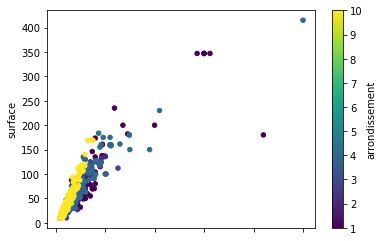

In [ ]:
house_data.plot.scatter('price','surface',c='arrondissement',colormap='viridis')
plt.plot()

On voit effectivement une relation linéaire se dégager.
Affichons maintenant le loyer en fonction de l'arrondissement

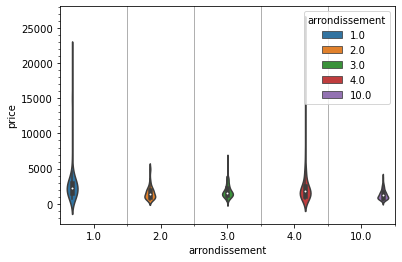

In [ ]:
ax1 = sns.violinplot("arrondissement", "price", data=house_data, hue='arrondissement')
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

La répartition des prix semble a peu près la même, avec moins de loyers élévés (+volatiles) dans le 10ème

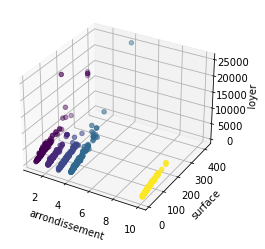

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure().gca(projection='3d')

# Pour faciliter la visualisation, on va changer la valeur de l'arrondissement (10)
fig.scatter(house_data['arrondissement'], house_data['surface'], house_data['price'], c=house_data['arrondissement'], cmap="viridis")
fig.set_xlabel('arrondissement')
fig.set_ylabel('surface')
fig.set_zlabel('loyer')
plt.show()

On va effectuer une régression specifique sur chaque arrondissement, pour avoir plus de précision. D'abord, séparation jeu de données d'entraînement / jeu de données test

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(house_data[["surface", "arrondissement"]], house_data[["price"]], test_size=0.3)

On crée le modèle de régression linéaire, le loyer en fonction de la surface

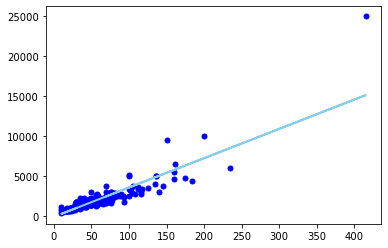

In [ ]:
lr = LinearRegression()
lr_baseline = lr.fit(xtrain[["surface"]], ytrain)
baseline_pred = lr_baseline.predict(xtest[["surface"]])

plt.plot(xtest[["surface"]], ytest, 'bo', markersize = 5)
plt.plot(xtest[["surface"]], baseline_pred, color="skyblue", linewidth = 2)

On regarde rapidement le R<sup>2</sup> de la régression

In [ ]:
def sumsq(x,y):
    return sum((x - y)**2)

def r2score(pred, target):
    return 1 - sumsq(pred, target) / sumsq(target, np.mean(target))

score_bl = r2score(baseline_pred[:,0], ytest['price'])

print(score_bl)

0.7888089922800076


In [ ]:
lrs = []
for i in np.unique(xtrain["arrondissement"]):
    
    # On génère un jeu de données par arrondissement
    train_arr = xtrain['arrondissement']==i
    test_arr = xtest['arrondissement']==i
    
    xtrain_arr = xtrain[train_arr]
    ytrain_arr = ytrain[train_arr]

    xtest_arr = xtest[test_arr]
    ytest_arr = ytest[test_arr]

    lr = LinearRegression()
    lr.fit(xtrain_arr[["surface"]], ytrain_arr)
    lrs.append(lr)

On effectue la prédiction finale sur le jeu de données test avec notre nouveau modèle, qui combine les différents modèles par arrondissement

In [ ]:
final_pred = []

for idx,val in xtest.iterrows():
    final_pred.append(lrs[int(val["arrondissement"]-1)].predict([[val["surface"]]])[0][0])
    print(final_pred)
r2score(final_pred, ytest["price"])

[2252.299959364775]
[2252.299959364775, 14778.335576861802]


IndexError: list index out of range

On peut afficher cette prédiction finale

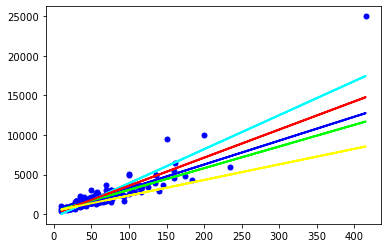

In [ ]:
plt.plot(xtest[["surface"]], ytest, 'bo', markersize = 5)
plt.plot(xtest[["surface"]], lrs[0].predict(xtest[["surface"]]), color="#00FFFF", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[1].predict(xtest[["surface"]]), color="#0000FF", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[2].predict(xtest[["surface"]]), color="#00FF00", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[3].predict(xtest[["surface"]]), color="#FF0000", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[4].predict(xtest[["surface"]]), color="#FFFF00", linewidth = 2)